Все созданные конформации лежат в первом аргументе функции get_all_saws, поэтому первым аргументом нужно подавать переменную, которой ранее присвоили пустой список 

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from math import sqrt 

In [5]:
def get_all_saws(current_paths, length, current_conformation):
    if(length==0):
        current_paths.append(current_conformation)
    else:
        for step in [(1, 0), (-1, 0), (0, 1),  (0, -1)]:
            new_point = (current_conformation[-1][0]+step[0], current_conformation[-1][1]+step[1] )
            if new_point in current_conformation:
                continue
            else:
                temp_path = current_conformation.copy()
                temp_path.append(new_point)
                get_all_saws(current_paths, length-1,  temp_path)

Функция  vector_for_distance возвращат вектор, который описывает конформацию
Функция distance_between_saws - метрика 
(Взяла из статьи Kit Fun Lau and Ken A. Dill) 

In [11]:
def vector_for_distance(saw):
    """docstring"""
    result = []
    left = [[(0,1), (-1, 0)] , [(1, 0), (0, 1)], [(0, -1), (1, 0)], [(-1, 0), (0, -1)] ]
    right = [ [(1, 0), (0, -1)], [(0,1), (1, 0)],  [(-1, 0), (0, 1)],  [(0, -1), (-1, 0)]  ]
    for i in range(2, len(saw)):
        steps = []
        dx = saw[i-1][0] - saw[i-2][0]
        dy =  saw[i-1][1] - saw[i-2][1]
        steps.append((dx, dy))
        dx = saw[i][0] - saw[i-1][0]
        dy =  saw[i][1] - saw[i-1][1]
        steps.append((dx, dy))
        if(saw[i][0] == saw[i-1][0] and saw[i-1][0]==saw[i-2][0] or saw[i][1] == saw[i-1][1] and saw[i-1][1]==saw[i-2][1]):
            result.append(0)
        elif (steps in left):
            result.append(-1)
        else:
            result.append(1)
    return result 
e=709
#print(vector_for_distance(conformations[e]))
#print(conformations[e])

In [9]:
def distance_between_saws(saw1, saw2):
    v1 = 0
    v2 = 0
    v_minus = []
    v_plus = [] 
    s1 =  vector_for_distance(saw1)
    s2= vector_for_distance(saw2)
    for i in range(len(s1)):
        v1=v1+ abs( s1[i]-s2[i])
        v2=v2+ abs( s1[i]+s2[i])
    #print(saw1, " ", s1)
    #print(saw2, " ", s2)
    #print(min(v1, v2))
    return min(v1, v2)

#print(distance_between_saws(conformations[e], conformations[700] ))
#print(distance_between_saws(conformations[1], conformations[165] ))

In [12]:
start_conformation = [(0,0)]
conformations =[]
get_all_saws(conformations, 3,start_conformation)
print(len(conformations))
w = filter_conformations(conformations)
print(w)
#print(conformations)

36


[[(0, 0), (1, 0), (2, 0), (3, 0)], [(0, 0), (1, 0), (2, 0), (2, 1)], [(0, 0), (1, 0), (1, 1), (2, 1)], [(0, 0), (1, 0), (1, 1), (0, 1)], [(0, 0), (1, 0), (1, 1), (1, 2)]]


In [7]:
def filter_conformations(saws ): 
    result = []
    result.append(saws[0])
    #result = [saws[0]]
    for i in range (1, len(saws)//4):
        if(i%100==0):
            print(i, end= " ")
        k=0
        for conformation in result:
            if(  distance_between_saws(conformation, saws[i] )== 0):
                k=-1
                break;
        if(k==-1):
            continue
        else:
            #if(saws[i])
            result.append(saws[i])
            
    print("\n")
    return result 


#q = filter_conformations(conformations)
#print(len(q))
#print(q)


In [16]:
number_of_saws = [] 
number_of_conformations=[]
for i in range(1, 11):
    c=[]
    get_all_saws(c, i,start_conformation )
    f = filter_conformations(c)
    number_of_saws.append(len(c))
    number_of_conformations.append(len(f))
    print(i, " finished", end = " ")
    
#тут осуществляется тупо перебор - это не очень хорошо 



1  finished 

2  finished 

3  finished 

4  finished 

5  finished 100 

6  finished 100 200 300 400 500 

7  finished 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 

8  finished 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 

9  finished 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 

10  finished 

In [18]:
print(number_of_saws)
print(number_of_conformations)

[4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100]
[1, 2, 5, 13, 36, 98, 272, 740, 2034, 5513]


No handles with labels found to put in legend.


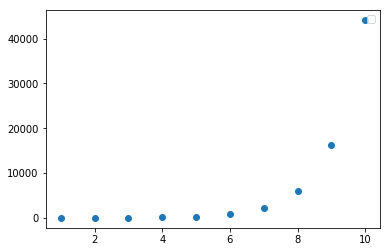

In [107]:
plt.plot(range(1, 11), number_of_saws, 'o')
plt.legend(loc='best')

No handles with labels found to put in legend.


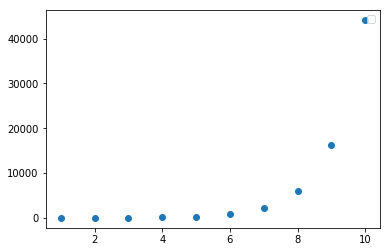

In [108]:
plt.plot(range(1, 11), number_of_saws, 'o')
plt.legend(loc='best')

Это просто графики всех случайных блужданий на коорднатной плоскости, стартующие с точки (0, 0) 

In [1]:
plt.plot(range(1, 11), number_of_conformations, 'o')
plt.legend(loc='best')

NameError: name 'plt' is not defined

In [9]:
def end_to_end_distance(path):
    distance = sqrt((path[-1][0]-path[0][0])**2+(path[-1][1]-path[0][1])**2)     
    return distance 

In [12]:
number_of_saws = [] 
means=[]
#number_of_conformations=[]
for i in range(1, 11):
    c=[]
    get_all_saws(c, i,start_conformation )
    #f = filter_conformations(c)
    number_of_saws.append(len(c))
    dists=[]   

    for j in c:
        dists.append(end_to_end_distance(j))
    sqrdists=[]  
    for j in dists:
        sqrdists.append(j*j)
    
    means.append(sum(sqrdists) / float(len(sqrdists)))
    
    
    #number_of_conformations.append(len(f))
    print(i, " finished", end = " ")

1  finished 2  finished 3  finished 4  finished 5  finished 6  finished 7  finished 8  finished 9  finished 10  finished 

In [3]:
plt.plot(range(1, 11), means, 'o')
plt.legend(loc='best')

NameError: name 'means' is not defined